In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow as tf
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [2]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
        
train_path = 'New Plant Diseases Dataset(Augmented)/train'
valid_path = 'New Plant Diseases Dataset(Augmented)/valid '

In [4]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front of Inception
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 27s 0us/step


In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
# useful for getting number of output classes
folders = glob('New Plant Diseases Dataset(Augmented)/train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [16]:
len(training_set)

574

In [17]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
) 

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 574 steps, validate for 144 steps
Epoch 1/5
574/574 [==============================] - 5995s 10s/step - loss: 2.2308 - accuracy: 0.6500 - val_loss: 6.0383 - val_accuracy: 0.4648
Epoch 2/5
574/574 [==============================] - 2695s 5s/step - loss: 1.9724 - accuracy: 0.7520 - val_loss: 9.1846 - val_accuracy: 0.4183
Epoch 3/5
574/574 [==============================] - 2673s 5s/step - loss: 1.8908 - accuracy: 0.7860 - val_loss: 10.7922 - val_accuracy: 0.4275
Epoch 4/5
574/574 [==============================] - 2728s 5s/step - loss: 1.7470 - accuracy: 0.8120 - val_loss: 9.7826 - val_accuracy: 0.4728
Epoch 5/5
574/574 [==============================] - 2870s 5s/step - loss: 1.9207 - accuracy: 0.8152 - val_loss: 15.0944 - val_accuracy: 0.4033


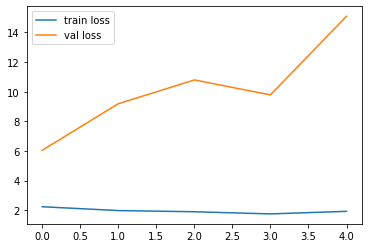

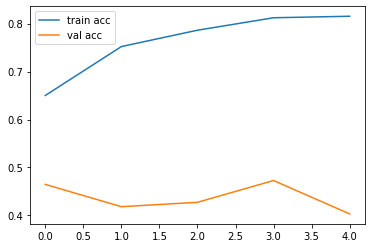

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [43]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [44]:
y_pred = model.predict(test_set)

In [45]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [59]:
y_pred

array([1, 1, 1, ..., 9, 8, 8], dtype=int64)

In [60]:
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_inception.h5')

In [61]:
img = image.load_img("New Plant Diseases Dataset(Augmented)/testimg.jpg",target_size=(224,224))

In [62]:
x = image.img_to_array(img)
x

array([[[ 26.,  67.,   0.],
        [ 29.,  68.,   3.],
        [ 35.,  73.,  12.],
        ...,
        [ 77., 125.,  73.],
        [ 96., 141.,  84.],
        [ 99., 149.,  78.]],

       [[ 30.,  69.,   2.],
        [ 35.,  74.,  11.],
        [ 53.,  92.,  29.],
        ...,
        [114., 157.,  77.],
        [123., 166.,  77.],
        [107., 149.,  75.]],

       [[ 35.,  70.,   6.],
        [ 46.,  82.,  21.],
        [ 70., 109.,  42.],
        ...,
        [110., 150.,  77.],
        [114., 153.,  72.],
        [ 97., 136.,  79.]],

       ...,

       [[ 60.,  91.,  23.],
        [ 59.,  94.,  30.],
        [ 63.,  98.,  34.],
        ...,
        [ 56.,  88.,  39.],
        [ 70.,  96.,  49.],
        [ 43.,  50.,  43.]],

       [[ 66.,  94.,  20.],
        [ 55.,  95.,  25.],
        [ 57.,  96.,  29.],
        ...,
        [ 63.,  93.,  43.],
        [ 53.,  66.,  48.],
        [ 29.,  29.,  29.]],

       [[ 61.,  88.,  11.],
        [ 49.,  91.,  19.],
        [ 52.,  

In [63]:
x.shape

(224, 224, 3)

In [64]:
x = x/255

In [65]:
import numpy as np
from tensorflow.keras.applications.inception_v3 import decode_predictions

x = np.expand_dims(x , axis=0)

img_data = preprocess_input(x)

img_data.shape

(1, 224, 224, 3)

In [66]:
pred = model.predict(img_data)

In [72]:
test_set.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [78]:
pred

array([[5.9494045e-07, 5.7212794e-05, 9.8324943e-01, 8.1650105e-06,
        1.6683865e-02, 1.4549542e-07, 1.4556266e-10, 8.5665306e-18,
        5.9430073e-07, 3.8173534e-10]], dtype=float32)